In [27]:
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
df = pd.read_csv("../extraction_of_th-wildau_repository/records_th-wildau.csv")
df.head()

,UID,Discipline,Title,Keywords,Content,RVK(s)
0,27020,Betriebswirtschaft,Zur Bedeutung des Electronic Commerce und die ...,Electronic Commerce|Analyse|Hochschulschrift|E...,NaN,QP 120
1,46842,Wirtschaft / Recht,Die interne Revision als Internal Consultant -...,Hochschulschrift,NaN,PN 216
2,252219,Europäisches Management,Der Krieg um die Talente geht weiter: Organisa...,Organisationsentwicklung|Dienstleistungsbetrie...,Inhaltsverzeichnis Tabellenverzeichnis • V Abk...,QP 120
3,252220,Europäisches Management,Der zentralamerikanischen Zollunion: Fortschri...,Zollunion|Freier Warenverkehr|Hochschulschrift...,Table of Contents Acknowledgements V Abstract ...,QP 120
4,48555,Betriebswirtschaft,Global Sourcing im Einkauf von Fertigwaren - d...,Hochschulschrift,NaN,QP 120


## Analysis of None Values

Column 'UID' has 0 / 16530 missing values.
Column 'Discipline' has 6 / 16530 missing values.
Column 'Title' has 0 / 16530 missing values.
Column 'Keywords' has 45 / 16530 missing values.
Column 'Content' has 8867 / 16530 missing values.
Column 'RVK(s)' has 583 / 16530 missing values.


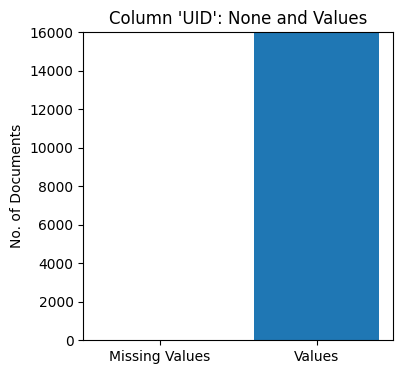

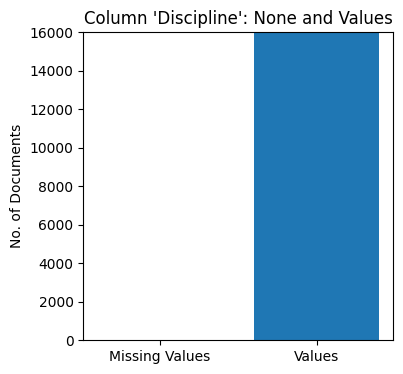

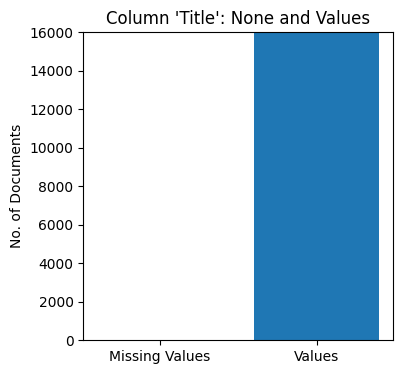

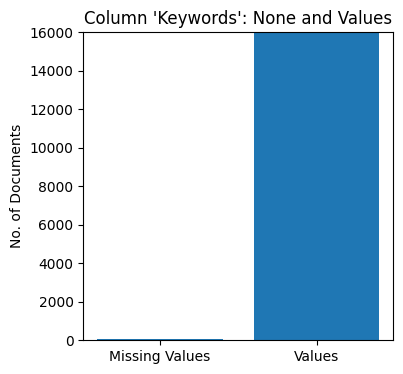

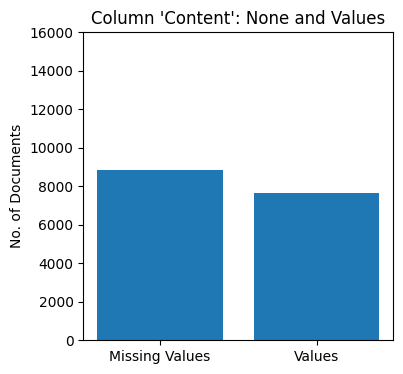

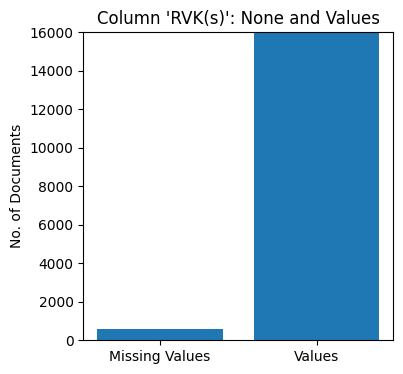

In [29]:
for column_name in df.columns:
	missing_values = df[column_name].isna().sum()
	values = len(df) - missing_values
	print(f"Column '{column_name}' has {missing_values} / {len(df)} missing values.")
	plt.figure(figsize=(4,4))
	plt.ylim([0, 16000])
	plt.title(f"Column '{column_name}': None and Values")
	plt.bar(["Missing Values", "Values"], [missing_values, values])
	plt.ylabel("No. of Documents")


## Analysis of Language
The TH Wildau repository provides a laguage code. However, this code is unreliable describing the language of the given metadata. As previous test sample has shown, meta data in the TH Wildau repository can be in mixed languages. A title can be in German, the table of content can be in English or vice versa. Unfortunately, meta data information with mixed language is useless for our purposes. As a consequence, we use the Python package langdetect to identify documents with uniform language use. 

In [30]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

In [31]:
df.head()

,UID,Discipline,Title,Keywords,Content,RVK(s)
0,27020,Betriebswirtschaft,Zur Bedeutung des Electronic Commerce und die ...,Electronic Commerce|Analyse|Hochschulschrift|E...,NaN,QP 120
1,46842,Wirtschaft / Recht,Die interne Revision als Internal Consultant -...,Hochschulschrift,NaN,PN 216
2,252219,Europäisches Management,Der Krieg um die Talente geht weiter: Organisa...,Organisationsentwicklung|Dienstleistungsbetrie...,Inhaltsverzeichnis Tabellenverzeichnis • V Abk...,QP 120
3,252220,Europäisches Management,Der zentralamerikanischen Zollunion: Fortschri...,Zollunion|Freier Warenverkehr|Hochschulschrift...,Table of Contents Acknowledgements V Abstract ...,QP 120
4,48555,Betriebswirtschaft,Global Sourcing im Einkauf von Fertigwaren - d...,Hochschulschrift,NaN,QP 120


Since only 50% of table of contents are available, we delete the "Content" column.

In [32]:
df.drop("Content", axis=1, inplace=True)


To do the language analysis properly, we delete all rows containing at least one missing value.

In [33]:
# Check if it worked.
df.dropna(inplace=True)
print(f"{len(df)} documents are left.")

15924 documents are left.


In [34]:
df.head()

,UID,Discipline,Title,Keywords,RVK(s)
0,27020,Betriebswirtschaft,Zur Bedeutung des Electronic Commerce und die ...,Electronic Commerce|Analyse|Hochschulschrift|E...,QP 120
1,46842,Wirtschaft / Recht,Die interne Revision als Internal Consultant -...,Hochschulschrift,PN 216
2,252219,Europäisches Management,Der Krieg um die Talente geht weiter: Organisa...,Organisationsentwicklung|Dienstleistungsbetrie...,QP 120
3,252220,Europäisches Management,Der zentralamerikanischen Zollunion: Fortschri...,Zollunion|Freier Warenverkehr|Hochschulschrift...,QP 120
4,48555,Betriebswirtschaft,Global Sourcing im Einkauf von Fertigwaren - d...,Hochschulschrift,QP 120


We create a function that does the analysis for Title and Keywords. Then it compares if language is uniform or mixed.

In [35]:

lang_title = list(df["Title"].apply(lambda x: detect(x)))

In [36]:
lang_keywords = list(df["Keywords"].apply(lambda x: detect(x)))

In [37]:
language = []
for i in range(len(lang_title)):
	if lang_title[i] == lang_keywords[i]:
		language.append(lang_title[i])
	else:
		language.append("mixed")

In [38]:
# Add language information to DataFrame.
df["Language"] = language

Show distribution of languages.

In [39]:
lang_distribution = df["Language"].value_counts()
lang_distribution

de       15046
mixed      866
en          10
nl           2
Name: Language, dtype: int64

Visual distribution:

<Axes: >

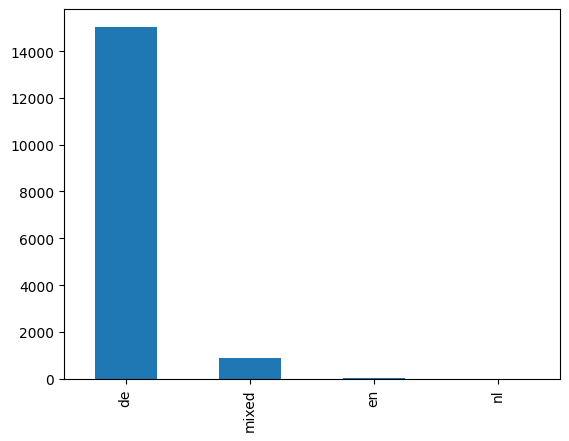

In [40]:
lang_distribution.plot(kind="bar")

Test sample is Ok, but not perfect:

In [41]:
mask = df["Language"].str.contains("mixed")
df[mask]


,UID,Discipline,Title,Keywords,RVK(s),Language
0,27020,Betriebswirtschaft,Zur Bedeutung des Electronic Commerce und die ...,Electronic Commerce|Analyse|Hochschulschrift|E...,QP 120,mixed
46,124287,Biosystemtechnik / Bioinformatik,Genomic variant detection for formalin fixed p...,Sequenzierbibliothek|Formalin-Fixierung|Tumor|...,WF 9720|ST 690,mixed
65,252279,Technical Management,Implementation of a CRM system in a medium-siz...,Kundenmanagement|Klein- und Mittelbetrieb|Hoch...,QP 500,mixed
74,122155,Europäisches Management,Discussion on China market entry strategies of...,Markteintrittsstrategie|Luxusgüterindustrie|Ch...,QP 120,mixed
96,4977,Technologie der metallverarbeitenden Industrie,"Softwareanpassung an das Programmpaket ""TEFU""",Programmierung|Software|Hochschulschrift|Progr...,ZS 3300,mixed
...,...,...,...,...,...,...
16377,147807,Wirtschaftsinformatik,Modern Client-Server Web Application Developme...,Programmierung|Framework (Informatik)|Hochschu...,QH 500|ST 230,mixed
16414,61918,Betriebswirtschaft,Comparison of the group cash flow statement ac...,Cashflow|Unternehmensplanung|Hochschulschrift|...,QP 120,mixed
16416,246095,Technical Management,Analysis of risks within the working environme...,Lastkraftwagenfahrer|Güterverkehr|Hochschulsch...,QP 500,mixed
16417,36876,Betriebswirtschaft,Mobile Marketing - Werbeinteressen und Privats...,Marketing|Privatsphäre|Hochschulschrift|Market...,QP 120,mixed


Other languages than German are negligible, therefore we delete non-German records and adapt our DataFrame:

In [42]:
mask2 = df["Language"].str.contains("de")
df = df[mask2]

## Analysis RVK notation

Some of the recordings have two RVKs. In the first step, we look at how many rows there are with more than one RVK (True).

In [43]:
rvk_distribution = df["RVK(s)"].str.contains("|", regex=False).value_counts()
rvk_distribution

False    12937
True      2109
Name: RVK(s), dtype: int64

<Axes: >

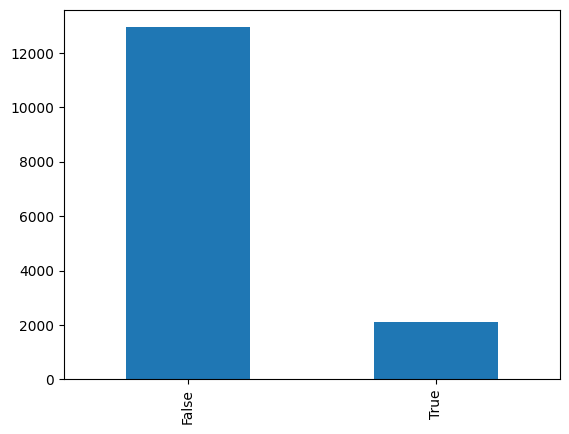

In [44]:
rvk_distribution.plot(kind="bar")

## Checking depth of RVK Notation
In the next steps we use the first RVK if there are two und analyse the depth of RVK notations. First, we remove the second RVK if available and adapt our DataFrame:

In [45]:
def remove_second_rvk(x):
	if "|" in x:
		first_rvk, *_ = x.split("|")
		return first_rvk
	else:
		return x

df["RVK"] = df["RVK(s)"].apply(remove_second_rvk)
# Delete columns "RVK(s)"
del df["RVK(s)"] 

Check, if it has worked.

In [46]:
rvk_distribution = df["RVK"].str.contains("|", regex=False).value_counts()
rvk_distribution

False    15046
Name: RVK, dtype: int64

Now we analyse the depth of each RVK notation. We assign return values to a new column "Depth".

In [47]:
def get_depth_of_rvk(x):
	letters, numbers = x.split(" ")
	return len(numbers)

df["Length_RVK"] = df["RVK"].apply(get_depth_of_rvk)
df.head()


,UID,Discipline,Title,Keywords,Language,RVK,Length_RVK
1,46842,Wirtschaft / Recht,Die interne Revision als Internal Consultant -...,Hochschulschrift,de,PN 216,3
2,252219,Europäisches Management,Der Krieg um die Talente geht weiter: Organisa...,Organisationsentwicklung|Dienstleistungsbetrie...,de,QP 120,3
3,252220,Europäisches Management,Der zentralamerikanischen Zollunion: Fortschri...,Zollunion|Freier Warenverkehr|Hochschulschrift...,de,QP 120,3
4,48555,Betriebswirtschaft,Global Sourcing im Einkauf von Fertigwaren - d...,Hochschulschrift,de,QP 120,3
5,4721,Allgemeiner Maschinenbau,Konstruktion eines Werkzeugeinstellplanes für ...,Werkzeugplanung|Konstruktion|Hochschulschrift|...,de,ZL 3000,4


### Depth

In [48]:
distribution_length_rvk = df["Length_RVK"].value_counts()
distribution_length_rvk

3    11726
4     3320
Name: Length_RVK, dtype: int64

<Axes: >

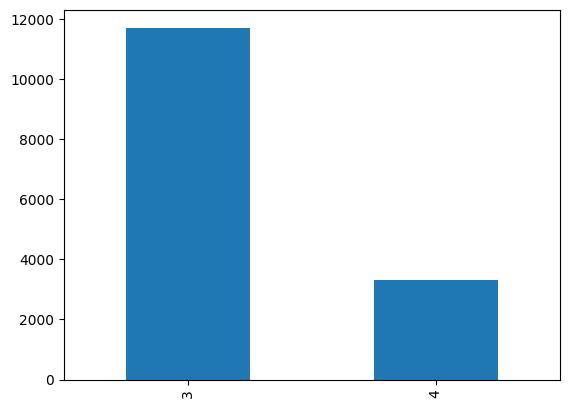

In [49]:
distribution_length_rvk.plot(kind="bar")

### Distribution of RVKs

<Axes: >

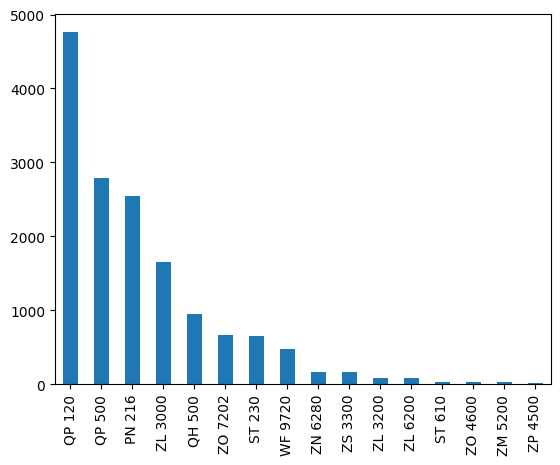

In [50]:
distribution_rvks = df["RVK"].value_counts()
distribution_rvks.plot(kind="bar")

## Research Fields
At the end we check what research fields are covered:

In [51]:
df["Discipline"].value_counts()

Betriebswirtschaft                                3499
Wirtschaftsingenieurwesen                         1655
Wirtschaft / Recht                                1546
Maschinenbau                                       992
Wirtschaftsinformatik                              947
Logistik                                           863
Europäisches Management                            698
Telematik                                          644
Verwaltung / Recht                                 641
Luftfahrttechnik / Luftfahrtlogistik               639
Business Management                                508
Biosystemtechnik / Bioinformatik                   471
Allgemeiner Maschinenbau                           229
Technisches Management / Logistik                  219
Öffentliche Verwaltung Brandenburg                 218
Physikalische Technik                              212
Photonik                                           165
Technologie der metallverarbeitenden Industrie     160
Verfahrens

## Save to file

In [52]:
df.to_csv("records_cleaned.csv", index=False)